In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [2]:
file = h5py.File('../../data/data_dragon.hd5')

In [3]:
# Get ground truths from the table
interaction_type = np.array(file['InteractionType']['value'], dtype=np.uint8)
pdg_encoding = np.array(file['PDGEncoding']['value'], dtype=np.uint8)
has_track = np.logical_and(pdg_encoding == 14, interaction_type == 1)
targets = has_track.astype(np.uint8)

In [4]:
# Get prediction
predicted = (np.array(file['DeltaLLH']['value']) >= 2.0).astype(np.uint8)

In [5]:
assert targets.shape == predicted.shape
targets.shape

(2202957,)

In [6]:
total_charge = np.array(file['TotalCharge']['value'])
total_charge_sorted = np.sort(total_charge)

In [7]:
# Find different cutoff values to check performance at different maximal energies by selecting the quantiles of the data
cutoffs = []
quantiles = []
for quantile in np.arange(0.00, 1.0, 0.01):
    quantile = 1.0 - quantile
    quantiles.append(quantile)
    cutoffs.append(total_charge_sorted[int(total_charge.shape[0] * quantile) - 1])

In [8]:
accuracies = []
for cutoff, quantile in zip(cutoffs, quantiles):
    mask = total_charge <= cutoff
    accuracy = (targets[mask] == predicted[mask]).sum() / mask.sum()
    accuracies.append(accuracy)
    labels, counts = np.unique(targets[mask], return_counts=True)
    for label, count in zip(labels, counts):
        if label == 1: 
            percentage = count / np.sum(counts)
            break
    print(f'Accuracy at cutoff {cutoff} ({quantile * 100}% of the data, {percentage * 100}% track_events): {accuracy}')
    

Accuracy at cutoff 2020.9750251919031 (100.0% of the data, 42.185753058275765% track_events): 0.5891608415416189
Accuracy at cutoff 188.14999978244305 (99.0% of the data, 42.149049463828916% track_events): 0.5888583157528886
Accuracy at cutoff 144.27500046789646 (98.0% of the data, 42.10024841388913% track_events): 0.5884768935247953
Accuracy at cutoff 121.87499941885471 (97.0% of the data, 42.03670980144773% track_events): 0.588066740669054
Accuracy at cutoff 107.32499998807907 (96.0% of the data, 41.969975950876616% track_events): 0.587685676160538
Accuracy at cutoff 96.59999978542328 (95.0% of the data, 41.900240299043055% track_events): 0.5872943971475658
Accuracy at cutoff 88.32500031590462 (94.0% of the data, 41.824550084774856% track_events): 0.5868883159429374
Accuracy at cutoff 81.65000051259995 (93.0% of the data, 41.75251165222128% track_events): 0.5864690242982188
Accuracy at cutoff 76.09999930858612 (92.0% of the data, 41.68222546775085% track_events): 0.5860947738217416
A

Accuracy at cutoff 13.825000002980232 (23.0% of the data, 38.32710665869337% track_events): 0.5802846310670606
Accuracy at cutoff 13.600000068545341 (21.999999999999996% of the data, 38.2952207831866% track_events): 0.5802983941352822
Accuracy at cutoff 13.37500011920929 (20.999999999999996% of the data, 38.26109887449555% track_events): 0.5803491722451944
Accuracy at cutoff 13.17499989271164 (19.999999999999996% of the data, 38.22345980759935% track_events): 0.5805765665175664
Accuracy at cutoff 12.949999988079071 (18.999999999999993% of the data, 38.17376140652621% track_events): 0.5807582055324638
Accuracy at cutoff 12.725000143051147 (17.999999999999993% of the data, 38.14027726646931% track_events): 0.5808399691365808
Accuracy at cutoff 12.524999976158142 (16.999999999999993% of the data, 38.08700432006361% track_events): 0.5809911864298236
Accuracy at cutoff 12.300000071525574 (16.000000000000004% of the data, 38.04814950344229% track_events): 0.5815753119619207
Accuracy at cutof

Text(0, 0.5, 'Accuracy')

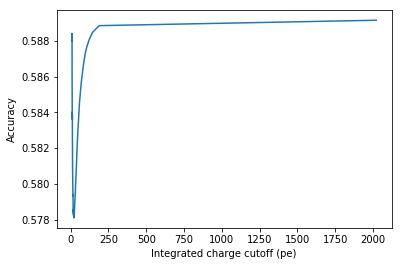

In [9]:
plt.plot(cutoffs, accuracies)
plt.xlabel('Integrated charge cutoff (pe)')
plt.ylabel('Accuracy')